In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Training Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Test Data.csv')


In [ ]:
test_data['profession'] = test_data['profession'].apply(lambda word: word.replace(' ', '_'))
test_data['city'] = test_data['city'].apply(lambda word: word.replace(' ', '_'))
test_data['state'] = test_data['state'].apply(lambda word: word.replace(' ', '_'))

In [ ]:
train_data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


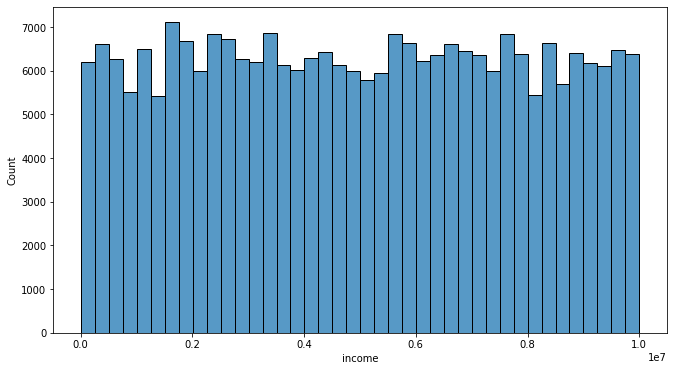

In [ ]:
plt.figure(figsize=(11,6))
sns.histplot(train_data['income'],bins=40)

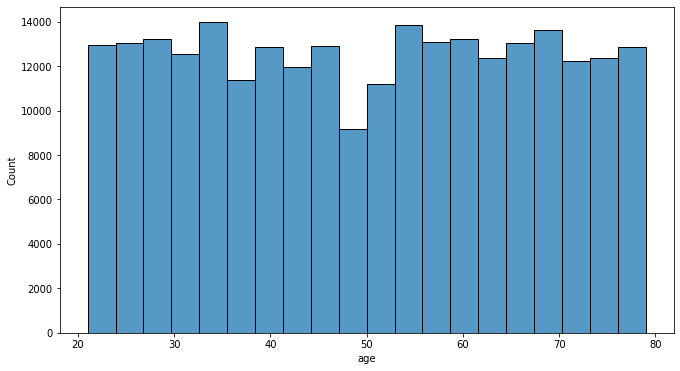

In [ ]:
plt.figure(figsize=(11,6))
sns.histplot(train_data['age'],bins=20)

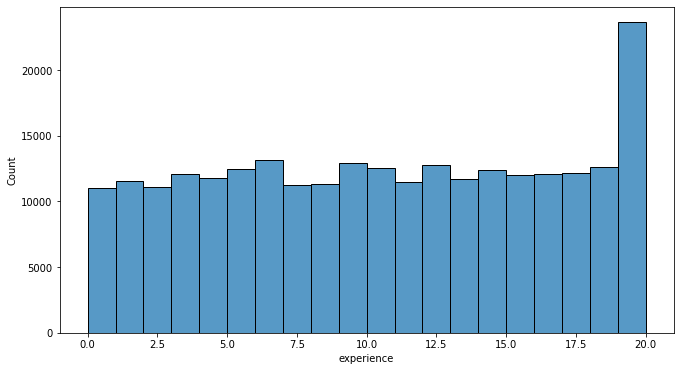

In [ ]:
plt.figure(figsize=(11,6))
sns.histplot(train_data['experience'],bins=20)

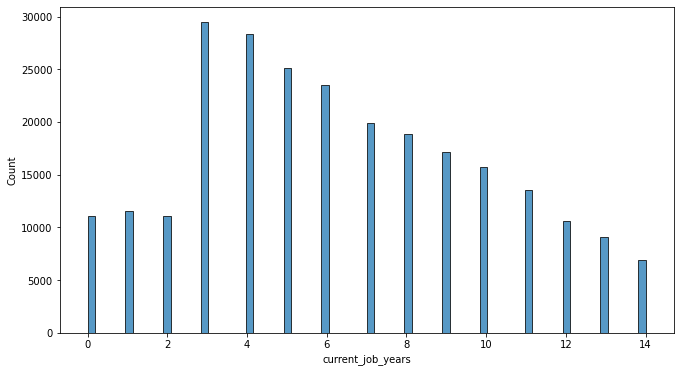

In [ ]:
plt.figure(figsize=(11,6))
sns.histplot(train_data['current_job_years'])

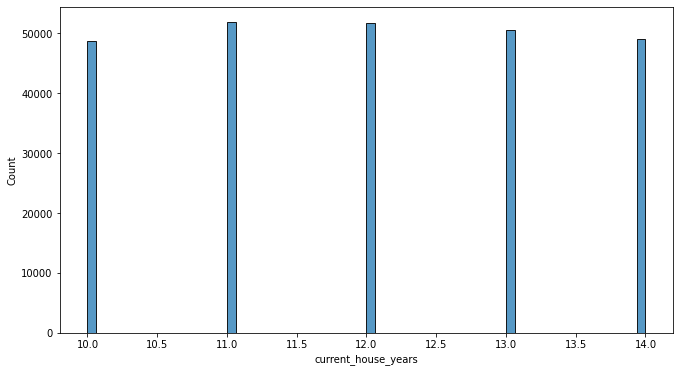

In [ ]:
plt.figure(figsize=(11,6))
sns.histplot(train_data['current_house_years'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


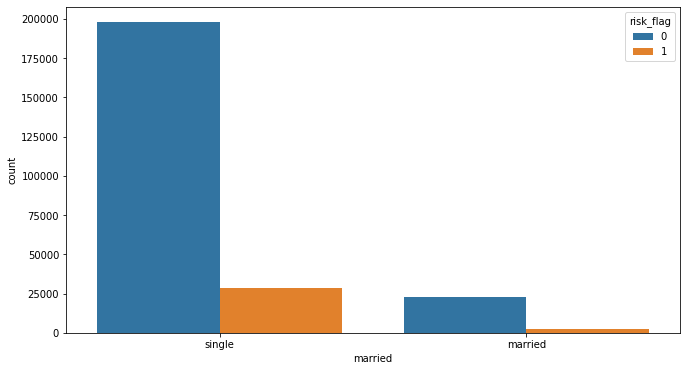

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(train_data['married'], hue=train_data['risk_flag'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


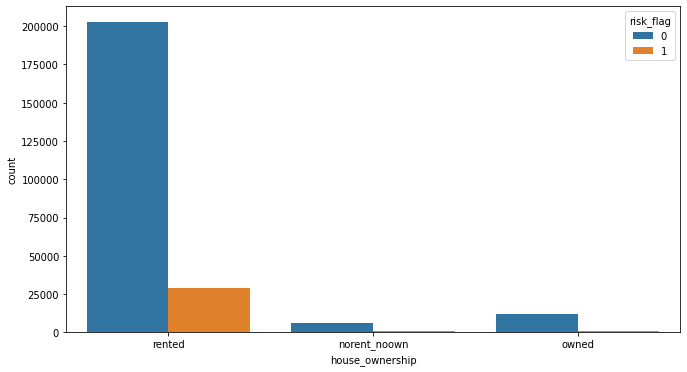

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(train_data['house_ownership'], hue=train_data['risk_flag'])

In [ ]:
#making a copy of the original data to work on so that original figures remains intact

df = train_data.copy(True)
df2 = test_data.copy(True)

In [ ]:
df.drop('Id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)


In [ ]:
#Chnaging the values to binay form from categorical

df['married'] = [0*i if df['married'][i]=='single' else 1 for i in range(len(df)) ]
df['house_ownership'] = [0 if df['house_ownership'][i]=='norent_noown' else 1 if df['house_ownership'][i]=='rented' else -1 for i in range(len(df))]
df['car_ownership'] = [0 if df['car_ownership'][i]=='no' else 1 for i in range(len(df))]

df2['married'] = [0*i if df2['married'][i]=='single' else 1 for i in range(len(df2)) ]
df2['house_ownership'] = [0 if df2['house_ownership'][i]=='norent_noown' else 1 if df2['house_ownership'][i]=='rented' else -1 for i in range(len(df2))]
df2['car_ownership'] = [0 if df2['car_ownership'][i]=='no' else 1 for i in range(len(df2))]



In [ ]:
# plt.figure(figsize=(16,8))
# sns.histplot(df['house_ownership'],bins=25)

In [ ]:
df['car_ownership'].value_counts()

0    176000
1     76000
Name: car_ownership, dtype: int64

In [ ]:
num_feat = df.select_dtypes(include='number').columns.tolist()[:-1]
cat_feat = df.select_dtypes(exclude='number').columns.tolist()
target_feat = df.select_dtypes(include='number').columns.tolist()[-1]

Y_ready = df[target_feat].values

transformer = ColumnTransformer([
                              ('encoding',OneHotEncoder() ,cat_feat),
                              ('scaling', MinMaxScaler(), num_feat),                              
                              ], remainder='passthrough')

print(num_feat)
print(cat_feat)
print(target_feat)



['income', 'age', 'experience', 'married', 'house_ownership', 'car_ownership', 'current_job_years', 'current_house_years']
['profession', 'city', 'state']
risk_flag


In [ ]:
df = transformer.fit_transform(df.iloc[:,:-1])
df2 = transformer.transform(df2)


In [ ]:
X_ready = df
X_test = df2

X_train, X_val, y_train, y_val = train_test_split(X_ready, Y_ready, test_size=0.2,stratify=Y_ready)



print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('\n')
print('X_val shape :', X_val.shape)
print('y_val shape :', y_val.shape)
print('\n')
print('X_test shape :', X_test.shape)





X_train shape : (201600, 405)
y_train shape : (201600,)


X_val shape : (50400, 405)
y_val shape : (50400,)


X_test shape : (28000, 405)


#### $\textbf{Random Forest}$

Rf(n_esti=500, class_weight=balanced) : Train 95.89 , Val : 93.76

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=800,class_weight='balanced')
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_score_forest = forest_clf.predict_proba(X_train)
roc_auc_score(y_train, y_score_forest[:,1])

0.9586691327436209

In [ ]:
roc_auc_score(y_val, forest_clf.predict_proba(X_val)[:,1])

0.9375486571303459

In [ ]:
y_predic_forest_no_pca = pd.DataFrame(forest_clf.predict(X_test))
y_predic_forest_no_pca['id'] = test_data['id']
y_predic_forest_no_pca

,0,id
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
27995,0,27996
27996,0,27997
27997,0,27998
27998,0,27999


In [ ]:
y_predic_forest_no_pca.columns = ['risk_flag', 'id']
y_predic_forest_no_pca[['id', 'risk_flag']].to_csv('Y_predict_forest_NoPCA.csv', index=False)

#### $\textbf{Grid Random Forest with pca}$

Pca with 50, Rf(n_esti=300, class_weight=balanced) : Train 95.65 , Val : 92.63


Pca with 50, Rf(n_esti=500, class_weight=balanced) : Train 95.57 , Val : 92.76

Pca with 60, Rf(n_esti=500, class_weight=balanced) : Train 95.7 , Val : 93.04

Pca with 70, Rf(n_esti=500, class_weight=balanced) : Train 95.64 , Val : 93.47

Pca with 70, Rf(n_esti=700, class_weight=balanced) : Train 95.65 , Val : 93.48

Pca with 70, Rf(n_esti=700, class_weight=balanced) : Train 95.65 , Val : 93.78

Pca with 100, Rf(n_esti=900, class_weight=balanced) : Train 95.65 , Val : 93.74

In [ ]:

pca = PCA(n_components=50)

pipe = Pipeline([
                 ('pca', pca),
                 ('rforest', RandomForestClassifier(n_estimators=500, class_weight='balanced',max_depth=None))
                 ])



In [ ]:
pipe.fit(X_train.toarray(), y_train)

In [ ]:
roc_auc_score(y_train, pipe.predict(X_train.toarray()))

0.8700684299132098

In [ ]:
roc_auc_score(y_val, pipe.predict(X_val.toarray()))

0.8062458131920418

In [ ]:
y_predic_forest = pipe.predict(X_test.toarray())
y_predic_forest_df = pd.DataFrame(y_predic_forest)
y_predic_forest_df['id'] = test_data['id']

In [ ]:
y_predic_forest_df.columns = ['risk_flag', 'id']
y_predic_forest_df[['id', 'risk_flag']].to_csv('Y_predicted_1500forest_200pca.csv', index=False)

#### $\textbf{LGBM}$
estimator :2000, learning_rate :0.01, num_leaves=1000, max_depth=50, class_Weight= balanced nthrea=4 , silent=-1. verbose=-1,Train :97.48 , val :93.25

n_estimator =2000, Train:96.82 , Val :91.84


In [ ]:
from lightgbm import LGBMClassifier


pca_lgbm = PCA(n_components=100)

lgbm_clf = LGBMClassifier(
                    # nthread=4,
                     n_estimators=2000,
                    # learning_rate=0.01,
                    # num_leaves=1000,
                    # #colsample_bytree=0.9497036,
                    # #subsample=0.8715623,
                    # max_depth=50,
                    # #reg_alpha=0.04,
                    # #reg_lambda=0.073,
                    # #min_split_gain=0.01,
                    # #min_child_weight=40,
                    # silent=-1,
                    # verbose=-1,
                    # class_weight='balanced'
                     )



pipe_lgbm = Pipeline([
                 ('pca_lgbm', pca_lgbm),
                 ('lgbm', lgbm_clf)
                 ])



pipe_lgbm.fit(X_train.toarray(), y_train)

Pipeline(memory=None,
         steps=[('pca_lgbm',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=2000,
                                n_jobs=-1, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
print('Train score')
print(roc_auc_score(y_train, pipe_lgbm.predict_proba(X_train.toarray())[:,1]))

print('Val score')
roc_auc_score(y_val, pipe_lgbm.predict_proba(X_val.toarray())[:,1])

Train score
0.9682414712204181
Val score


0.9184207633922055

In [ ]:
# y_predic_lgbm = pipe_lgbm.predict(X_test.toarray())

In [ ]:
# y_predic_lgbm_df = pd.DataFrame(y_predic_lgbm)
# y_predic_lgbm_df['id'] = test_data['id']
# y_predic_lgbm_df.columns = ['risk_flag', 'id']


In [ ]:
# y_predic_lgbm_df[['id', 'risk_flag']].to_csv('Y_predicted_Lgbm.csv', index=False)